# Time Series
by Mutembesa Daniel - Makerere AI Research lab

What makes Time Series Special?

Time Sereis are collected at time intervals 
* Time dependent
* Trend and Seasonality


1. Loading and Handling Time Series in Pandas
2. How to Check Stationarity of a Time Series?
3. How to make a Time Series Stationary?
4. Forecasting a Time Series


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15, 6

Data

In [39]:
data = pd.read_csv('/Users/macbook/Downloads/Research Datasets/AirPassengers.csv')
print (data.shape)

(144, 2)


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


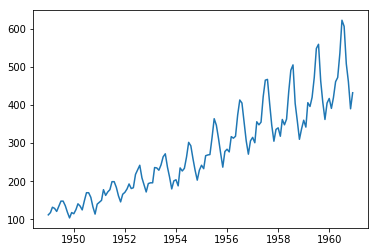

In [64]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/Users/macbook/Downloads/Research Datasets/AirPassengers.csv',
                   parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print (data.head())
plt.plot(data)

# Stationality

A time series is stationary if it has constant statistical properties over time,

1. constant mean
2. constant variance
3. an autocovariance that does not depend on time.

Checking for stationarity
Plotting Rolling Statistics: We can plot the moving average N.B a visual technique.
** Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. 
Here the null hypothesis is that the TS is non-stationary.

# Eliminating Trend and Seasonality

There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, 
the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars 
in a particular month because of pay increment or festivals.

/Users/macbook/.local/lib/python3.7/site-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


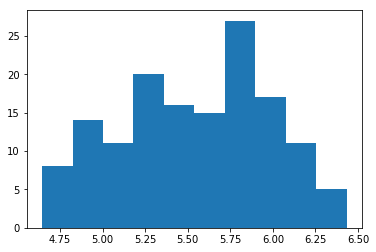

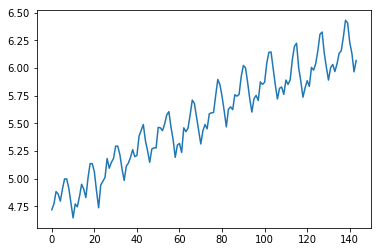

In [66]:
from pandas import Series
from matplotlib import pyplot
from numpy import log
series = Series.from_csv('/Users/macbook/Downloads/Research Datasets/AirPassengers.csv', header=0)
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

Dickery-Fuller Test for stationarity

In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


NOTE:   the test statistic is smaller than the 5% critical values 
so we can say with 95% confidence that this is a stationary series.

# Forecasting with ARIMA - AutoRegression Intergrated Moving Average


1. Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2. Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3. Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

In [67]:
#env
from statsmodels.tsa.arima_model import ARIMA

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -688.248
Method:                       css-mle   S.D. of innovations             29.720
Date:                Wed, 05 Jun 2019   AIC                           1390.495
Time:                        09:51:40   BIC                           1411.235
Sample:                    02-01-1949   HQIC                          1398.923
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6402      2.016      1.310      0.193      -1.311       6.592
ar.L1.D.#Passengers     0.3120      0.084      3.715      0.000       0.147       0.477
ar.L2.D.#Passeng

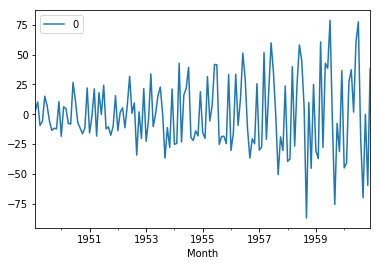

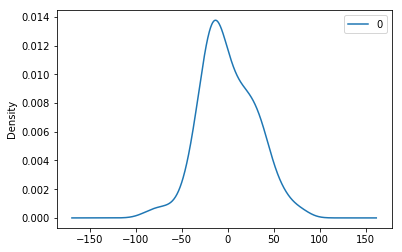

                0
count  143.000000
mean     0.010262
std     29.828333
min    -86.805534
25%    -19.916186
50%     -5.624250
75%     21.573849
max     78.697576


In [69]:

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('/Users/macbook/Downloads/Research Datasets/AirPassengers.csv',
                  header=0, parse_dates=[0], index_col=0, squeeze=True)#, date_parser=parser)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=279.908332, expected=306.000000
predicted=346.953485, expected=315.000000
predicted=325.749773, expected=301.000000
predicted=305.826132, expected=356.000000
predicted=365.160632, expected=348.000000
predicted=330.488058, expected=355.000000
predicted=368.172539, expected=422.000000
predicted=417.317388, expected=465.000000
predicted=468.888406, expected=467.000000
predicted=462.688155, expected=404.000000
predicted=368.300067, expected=347.000000
predicted=340.324503, expected=305.000000
predicted=308.878323, expected=336.000000
predicted=383.349040, expected=340.000000
predicted=351.781307, expected=318.000000
predicted=322.739364, expected=362.000000
predicted=372.884436, expected=348.000000
predicted=333.332474, expected=363.000000
predicted=382.493424, expected=435.000000
predicted=435.787764, expected=491.000000
predicted=502.006310, expected=505.000000
predicted=497.701957, expected=404.000000
predicted=347.130105, expected=359.000000
predicted=364.777333, expected=310

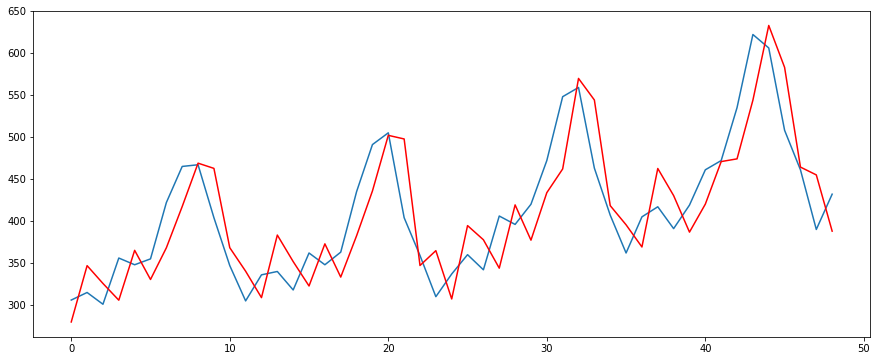

In [62]:
# Rolling ARIMA model
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('/Users/macbook/Downloads/Research Datasets/AirPassengers.csv',
                  header=0, parse_dates=[0], index_col=0, squeeze=True) #, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()